In [45]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ts.set_token('4b8f14b8f61d132d377af041f006e83816dab1895caaa8d8c81e4f1a')

In [46]:
df = ts.get_k_data('000002', start='2020-01-01', end='2021-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


/opt/anaconda3/envs/hoho_RL/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


In [47]:
df.head()

,date,open,close,high,low,volume,code
0,2020-01-02,29.565,29.325,30.365,29.275,1012130.0,000002
1,2020-01-03,29.475,28.815,29.575,28.545,805536.0,000002
2,2020-01-06,28.515,28.275,28.525,28.015,876840.0,000002
3,2020-01-07,28.375,28.525,28.695,28.115,577933.0,000002
4,2020-01-08,28.065,28.445,28.535,27.815,529996.0,000002


In [48]:
# df = ts.get_tick_data('000002', date='2018-12-12', src='tt')

In [49]:
# df = ts.get_index()

In [50]:
df = df.set_index('date')

In [51]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2020-01-02,29.565,29.325,30.365,29.275,1012130.0,000002
2020-01-03,29.475,28.815,29.575,28.545,805536.0,000002
2020-01-06,28.515,28.275,28.525,28.015,876840.0,000002
2020-01-07,28.375,28.525,28.695,28.115,577933.0,000002
2020-01-08,28.065,28.445,28.535,27.815,529996.0,000002


In [52]:
df['close-open'] = (df['close'] - df['open']) / df['open']
df['high-low'] = (df['high'] - df['low']) / df['low']
df['pre_close'] = df['close'].shift(1)  
df['price_change'] = df['close'] - df['pre_close']  # 当天股价变化
df['p_change'] = (df['close'] - df['pre_close']) / df['pre_close'] * 100   # 当天股价变化百分比

In [53]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change
date,,,,,,,,,,,
2020-01-02,29.565,29.325,30.365,29.275,1012130.0,000002,-0.008118,0.037233,NaN,NaN,NaN
2020-01-03,29.475,28.815,29.575,28.545,805536.0,000002,-0.022392,0.036083,29.325,-0.51,-1.739130
2020-01-06,28.515,28.275,28.525,28.015,876840.0,000002,-0.008417,0.018205,28.815,-0.54,-1.874024
2020-01-07,28.375,28.525,28.695,28.115,577933.0,000002,0.005286,0.020630,28.275,0.25,0.884173
2020-01-08,28.065,28.445,28.535,27.815,529996.0,000002,0.013540,0.025885,28.525,-0.08,-0.280456


In [54]:
df['MA5'] = df['close'].rolling(5).mean()   # 股价5日移动平均值（采用算术平均）
df['MA10'] = df['close'].rolling(10).mean()

In [55]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10
date,,,,,,,,,,,,,
2020-01-02,29.565,29.325,30.365,29.275,1012130.0,000002,-0.008118,0.037233,NaN,NaN,NaN,NaN,NaN
2020-01-03,29.475,28.815,29.575,28.545,805536.0,000002,-0.022392,0.036083,29.325,-0.51,-1.739130,NaN,NaN
2020-01-06,28.515,28.275,28.525,28.015,876840.0,000002,-0.008417,0.018205,28.815,-0.54,-1.874024,NaN,NaN
2020-01-07,28.375,28.525,28.695,28.115,577933.0,000002,0.005286,0.020630,28.275,0.25,0.884173,NaN,NaN
2020-01-08,28.065,28.445,28.535,27.815,529996.0,000002,0.013540,0.025885,28.525,-0.08,-0.280456,28.677,NaN


In [56]:
df.dropna(inplace=True)

In [57]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10
date,,,,,,,,,,,,,
2020-01-15,28.065,27.255,28.255,27.225,672944.0,000002,-0.028862,0.037833,28.155,-0.90,-3.196590,28.209,28.443
2020-01-16,27.385,27.295,27.695,27.165,581395.0,000002,-0.003286,0.019510,27.255,0.04,0.146762,27.875,28.240
2020-01-17,27.385,27.225,27.615,27.085,472219.0,000002,-0.005843,0.019568,27.295,-0.07,-0.256457,27.675,28.081
2020-01-20,27.265,26.635,27.275,26.285,915637.0,000002,-0.023107,0.037664,27.225,-0.59,-2.167126,27.313,27.917
2020-01-21,26.325,25.975,26.625,25.785,817969.0,000002,-0.013295,0.032577,26.635,-0.66,-2.477943,26.877,27.662


In [58]:
import talib

RSI值能反映短期内股价涨势相对于跌势的强弱。

$RSI = \frac{N日平均上涨价格}{N日平均上涨价格 + N日平均下跌价格}$

通常情况下，RSI值位于20~80之间，超过80为超买状态，低于20则为超卖状态

In [59]:
df['RSI'] = talib.RSI(df['close'], timeperiod=12)

In [60]:
data = pd.DataFrame()
data['close'] = [10, 12, 11, 13, 12, 14, 13]
data['RSI'] = talib.RSI(data['close'], timeperiod=6)
data

,close,RSI
0,10,NaN
1,12,NaN
2,11,NaN
3,13,NaN
4,12,NaN
5,14,NaN
6,13,66.666667


MOM反映了一段时期内股价的涨跌速度

$ MOM = \frac{当前收盘价}{N天前的收盘价}$

N天前：若当前为6号，则N天前为1号（-N+1）

In [61]:
df['MOM'] = talib.MOM(df['close'], timeperiod=5)

EMA: 指数式递减加权的移动平均，跟MA优点类似

$ EMA_{today} = \alpha Price_{today} + (1-\alpha)EMA_{yesterday}$

$\alpha 一般取 \frac{2}{N+1}, N为天数$

In [62]:
df['EMA12'] = talib.EMA(df['close'], timeperiod=12)
df['EMA26'] = talib.EMA(df['close'], timeperiod=26)

MACD值也是一种趋势类指标

In [63]:
df['MACD'], df['MACDsignal'], df['MACDhist'] = talib.MACD(df['close'], fastperiod=6, slowperiod=12, signalperiod=9)

In [64]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2020-01-15,28.065,27.255,28.255,27.225,672944.0,000002,-0.028862,0.037833,28.155,-0.90,-3.196590,28.209,28.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-16,27.385,27.295,27.695,27.165,581395.0,000002,-0.003286,0.019510,27.255,0.04,0.146762,27.875,28.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,27.385,27.225,27.615,27.085,472219.0,000002,-0.005843,0.019568,27.295,-0.07,-0.256457,27.675,28.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,27.265,26.635,27.275,26.285,915637.0,000002,-0.023107,0.037664,27.225,-0.59,-2.167126,27.313,27.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,26.325,25.975,26.625,25.785,817969.0,000002,-0.013295,0.032577,26.635,-0.66,-2.477943,26.877,27.662,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.tail()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2020-12-25,25.731,25.881,26.001,25.381,425877.0,000002,0.005830,0.024428,25.721,0.16,0.622060,25.799,26.131,37.372599,-0.40,26.246028,26.695561,-0.320603,-0.339637,0.019035
2020-12-28,25.961,26.201,26.431,25.641,583681.0,000002,0.009245,0.030810,25.881,0.32,1.236428,25.849,26.081,43.368169,0.25,26.239101,26.658927,-0.234940,-0.318698,0.083758
2020-12-29,26.341,26.301,26.641,26.101,539043.0,000002,-0.001519,0.020689,26.201,0.10,0.381665,25.943,26.078,45.158023,0.47,26.248624,26.632414,-0.159652,-0.286889,0.127237
2020-12-30,26.251,26.161,26.431,26.001,499719.0,000002,-0.003428,0.016538,26.301,-0.14,-0.532299,26.053,26.056,43.078635,0.55,26.235143,26.597494,-0.125592,-0.254629,0.129038
2020-12-31,26.071,26.481,26.581,26.021,651991.0,000002,0.015726,0.021521,26.161,0.32,1.223195,26.205,26.042,48.941129,0.76,26.272967,26.588865,-0.057288,-0.215161,0.157873


In [66]:
df.dropna(inplace=True)

In [67]:
X = df[['close', 'volume', 'close-open', 'MA5', 'MA10', 'high-low', 'RSI', 'MOM', 'EMA12', 'MACD', 'MACDsignal', 'MACDhist']]
y = np.where(df['price_change'].shift(-1) > 0, 1, -1)  # shift(-1) 表示这一列数据整体往上移一行。
# 若条件判断为真，则赋值1，否则赋值-1

In [68]:
X_length = X.shape[0]
split = int(X_length * 0.9)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)

In [69]:
X_train.shape

(188, 12)

In [85]:
X_test

,close,volume,close-open,MA5,MA10,high-low,RSI,MOM,EMA12,MACD,MACDsignal,MACDhist,prediction,p_change,origin,strategy
date,,,,,,,,,,,,,,,,
2020-12-03,28.681,533328.0,-0.016123,28.799,28.740,0.031061,60.058555,-0.04,28.489293,0.221696,0.341164,-0.119468,-1,NaN,NaN,NaN
2020-12-04,27.781,812748.0,-0.038753,28.477,28.653,0.043288,48.136037,-1.61,28.380324,0.064953,0.285922,-0.220969,-1,-0.031380,0.968620,1.031380
2020-12-07,27.191,630087.0,-0.022996,28.219,28.490,0.030213,42.151818,-1.29,28.197351,-0.110439,0.206650,-0.317089,-1,-0.021238,0.948049,1.053284
2020-12-08,26.961,513261.0,-0.009915,27.905,28.323,0.017471,40.035196,-1.57,28.007144,-0.241920,0.116936,-0.358856,-1,-0.008459,0.940030,1.062193
2020-12-09,26.441,637035.0,-0.027225,27.411,28.109,0.029500,35.623299,-2.47,27.766198,-0.379325,0.017684,-0.397008,-1,-0.019287,0.921900,1.082680
2020-12-10,26.361,578870.0,-0.008650,26.947,27.873,0.021000,34.976404,-2.32,27.550014,-0.456247,-0.077102,-0.379145,1,-0.003026,0.919110,1.085955
2020-12-11,26.241,593672.0,-0.009063,26.639,27.558,0.020015,33.967064,-1.54,27.348627,-0.498508,-0.161384,-0.337124,1,-0.004552,0.914926,1.081012
2020-12-14,26.701,650710.0,0.012130,26.541,27.380,0.022926,41.077681,-0.49,27.248992,-0.441479,-0.217403,-0.224076,-1,0.017530,0.930965,1.099962
2020-12-15,26.331,518015.0,-0.007912,26.415,27.160,0.019178,37.531394,-0.63,27.107763,-0.436396,-0.261201,-0.175195,1,-0.013857,0.918064,1.115204


In [70]:
model = RandomForestClassifier(max_depth=3, n_estimators=10, min_samples_leaf=10, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=10,
                       random_state=1)

In [71]:
y_pred = model.predict(X_test)

a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

In [72]:
a.head()

,预测值,实际值
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1


In [73]:
y_pred_proba = model.predict_proba(X_test)

In [74]:
score = accuracy_score(y_pred, y_test)

In [75]:
score

0.7142857142857143

In [76]:
features = X.columns
importances = model.feature_importances_
a = pd.DataFrame()
a['特征'] = features
a['特征重要性'] = importances
a = a.sort_values('特征重要性', ascending=False)

In [77]:
a

,特征,特征重要性
1,volume,0.164089
10,MACDsignal,0.154862
11,MACDhist,0.141352
7,MOM,0.111860
9,MACD,0.109722
0,close,0.076938
2,close-open,0.053224
3,MA5,0.051251
4,MA10,0.047466
8,EMA12,0.036668


In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [5, 10, 20], 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [5, 10, 20, 30]}
new_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(new_model, parameters, cv=6, scoring='accuracy')  # cv为交叉验证参数，如cv=6为6折交叉验证
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 30, 'n_estimators': 10}

收益回测曲线：看根据搭建的模型获得的结果是否比不利用模型获得的结果好

In [79]:
X_test['prediction'] = model.predict(X_test)

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_4500/2913222435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prediction'] = model.predict(X_test)


In [80]:
X_test['p_change'] = (X_test['close'] - X_test['close'].shift(1)) / X_test['close'].shift(1)

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_4500/3133796078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['p_change'] = (X_test['close'] - X_test['close'].shift(1)) / X_test['close'].shift(1)


In [81]:
X_test['origin'] = (X_test['p_change'] + 1).cumprod()  # cumprod即累积求乘积

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_4500/3513897069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['origin'] = (X_test['p_change'] + 1).cumprod()  # cumprod即累积求乘积


In [82]:
X_test

,close,volume,close-open,MA5,MA10,high-low,RSI,MOM,EMA12,MACD,MACDsignal,MACDhist,prediction,p_change,origin
date,,,,,,,,,,,,,,,
2020-12-03,28.681,533328.0,-0.016123,28.799,28.740,0.031061,60.058555,-0.04,28.489293,0.221696,0.341164,-0.119468,-1,NaN,NaN
2020-12-04,27.781,812748.0,-0.038753,28.477,28.653,0.043288,48.136037,-1.61,28.380324,0.064953,0.285922,-0.220969,-1,-0.031380,0.968620
2020-12-07,27.191,630087.0,-0.022996,28.219,28.490,0.030213,42.151818,-1.29,28.197351,-0.110439,0.206650,-0.317089,-1,-0.021238,0.948049
2020-12-08,26.961,513261.0,-0.009915,27.905,28.323,0.017471,40.035196,-1.57,28.007144,-0.241920,0.116936,-0.358856,-1,-0.008459,0.940030
2020-12-09,26.441,637035.0,-0.027225,27.411,28.109,0.029500,35.623299,-2.47,27.766198,-0.379325,0.017684,-0.397008,-1,-0.019287,0.921900
2020-12-10,26.361,578870.0,-0.008650,26.947,27.873,0.021000,34.976404,-2.32,27.550014,-0.456247,-0.077102,-0.379145,1,-0.003026,0.919110
2020-12-11,26.241,593672.0,-0.009063,26.639,27.558,0.020015,33.967064,-1.54,27.348627,-0.498508,-0.161384,-0.337124,1,-0.004552,0.914926
2020-12-14,26.701,650710.0,0.012130,26.541,27.380,0.022926,41.077681,-0.49,27.248992,-0.441479,-0.217403,-0.224076,-1,0.017530,0.930965
2020-12-15,26.331,518015.0,-0.007912,26.415,27.160,0.019178,37.531394,-0.63,27.107763,-0.436396,-0.261201,-0.175195,1,-0.013857,0.918064


In [83]:
X_test['strategy'] = (X_test['prediction'].shift(1) * X_test['p_change'] + 1).cumprod()

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_4500/136331118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['strategy'] = (X_test['prediction'].shift(1) * X_test['p_change'] + 1).cumprod()


In [84]:
X_test.tail()

,close,volume,close-open,MA5,MA10,high-low,RSI,MOM,EMA12,MACD,MACDsignal,MACDhist,prediction,p_change,origin,strategy
date,,,,,,,,,,,,,,,,
2020-12-25,25.881,425877.0,0.005830,25.799,26.131,0.024428,37.372599,-0.40,26.246028,-0.320603,-0.339637,0.019035,1,0.006221,0.902374,1.096145
2020-12-28,26.201,583681.0,0.009245,25.849,26.081,0.030810,43.368169,0.25,26.239101,-0.234940,-0.318698,0.083758,1,0.012364,0.913532,1.109698
2020-12-29,26.301,539043.0,-0.001519,25.943,26.078,0.020689,45.158023,0.47,26.248624,-0.159652,-0.286889,0.127237,1,0.003817,0.917018,1.113934
2020-12-30,26.161,499719.0,-0.003428,26.053,26.056,0.016538,43.078635,0.55,26.235143,-0.125592,-0.254629,0.129038,1,-0.005323,0.912137,1.108004
2020-12-31,26.481,651991.0,0.015726,26.205,26.042,0.021521,48.941129,0.76,26.272967,-0.057288,-0.215161,0.157873,-1,0.012232,0.923294,1.121557


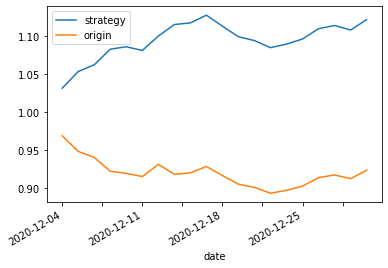

In [42]:
X_test[['strategy', 'origin']].dropna().plot()
plt.gcf().autofmt_xdate()
plt.show()